### Lexicon based sentiment analysis

In [1]:
# pip install NRCLex

In [2]:
# Import required modules
from nrclex import NRCLex
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [5]:
# load preprocessed data
df = pd.read_csv('preprocessed_data_new.csv')
df.head(5)

,text,class,stemmed_processed_text,lemmatized_processed_text
0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece..."
1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'get', 'affect', 'compliment', 'come...","['weird', 'get', 'affected', 'compliment', 'co..."
2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ..."
3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']"
4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'..."


In [6]:
# join the words
txtlist = []

for i in range(len(df)):
    cleaned_text = re.sub(r"[\[\],']", "", df['lemmatized_processed_text'][i])
    txtlist.append(cleaned_text)

# append the clean values to dataframe
df['clean_lemmatized_processed_text'] = txtlist
print(txtlist[0])
str_list = ','.join(txtlist)

ex wife threatening suicide recently left wife good cheated twice lied much decided refuse go back day ago began threatening suicide tirelessly spent pa day talking keep hesitating want believe come back know lot people threaten order get way happens really supposed handle death hand still love wife deal getting cheated constantly feeling insecure worried today may day hope much happen


### Support Vector Machine

In [14]:
# import relevant libraries
# Data processing
import pandas as pd
import numpy as np
# Encoding the data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# Modeling 
from sklearn.model_selection import train_test_split
from sklearn import svm 
# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import pickle

In [9]:
# Calculate emotion scores for each text 
df['emotions'] = df['clean_lemmatized_processed_text'].apply(lambda x: NRCLex(x).affect_frequencies)

In [8]:
df['emotions'][3]

{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.0,
 'negative': 0.5,
 'sadness': 0.5,
 'disgust': 0.0,
 'joy': 0.0}

In [9]:
df['emotions'][2]

{'fear': 0.1,
 'anger': 0.1,
 'anticip': 0.0,
 'trust': 0.15,
 'surprise': 0.05,
 'positive': 0.15,
 'negative': 0.1,
 'sadness': 0.05,
 'disgust': 0.1,
 'joy': 0.1,
 'anticipation': 0.1}

In [10]:
X = []
lexicon = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

# Make all emotion scores have the same emotions (Same length)
# Create a list of feature vectors for all the text samples
for i in range(len(df)):
    emotion_scores = df['emotions'][i]
    for category in lexicon:
        if category not in emotion_scores:
            emotion_scores[category] = 0
    # sort the values by the correct emotion order
    sorted_scores = {key: value for key, value in sorted(emotion_scores.items())}
    feature_vector = list(sorted_scores.values())
    X.append(feature_vector)

y = df['class'].tolist()
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
# open a file, where you ant to store the data
file = open('svm_sentimentanalysis_model', 'wb')

# Save the trained model as a pickle string.
saved_model = pickle.dumps(file)

# close the file
file.close()

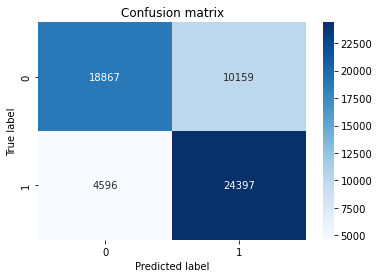

SVM Accuracy Score ->  74.56867577862424


In [11]:
# Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Define labels for the confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Non-suicide', 'Suicide']

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=categories, yticklabels=categories, fmt='g')

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

# Evaluation: Accuracy Score
print("SVM Accuracy Score -> ",accuracy_score(y_pred, y_test)*100)

### Logistic Regression

In [12]:
# fit the training dataset on the Logistic Regression classifier
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train,y_train)
# predict the labels on validation dataset
y_pred_logreg = logreg.predict(X_test)

In [15]:
print(metrics.classification_report(y_test, y_pred_logreg, target_names=['Non-Suicide', 'Suicide']))

              precision    recall  f1-score   support

 Non-Suicide       0.76      0.69      0.72     29026
     Suicide       0.71      0.78      0.75     28993

    accuracy                           0.73     58019
   macro avg       0.74      0.73      0.73     58019
weighted avg       0.74      0.73      0.73     58019



In [17]:
print("Logistic Regression Accuracy Score -> ",accuracy_score(y_pred_logreg, y_test)*100)

Logistic Regression Accuracy Score ->  73.36217446009066


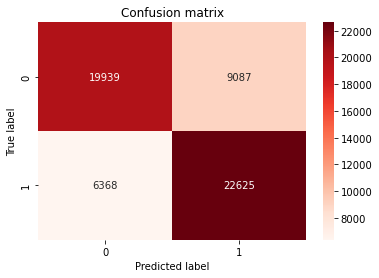

In [18]:
# Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
# Define labels for the confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Non-suicide', 'Suicide']

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=categories, yticklabels=categories, fmt='g')

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

### Naive Bayes

In [19]:
#Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
#predicted y
y_pred_nb = naive_bayes_classifier.predict(X_test)

In [21]:
print(metrics.classification_report(y_test, y_pred_nb, target_names=['Non-Suicide', 'Suicide']))

              precision    recall  f1-score   support

 Non-Suicide       0.67      0.56      0.61     29026
     Suicide       0.62      0.72      0.67     28993

    accuracy                           0.64     58019
   macro avg       0.65      0.64      0.64     58019
weighted avg       0.65      0.64      0.64     58019



In [23]:
print("Naive Bayes Accuracy Score -> ",accuracy_score(y_pred_nb, y_test)*100)

Naive Bayes Accuracy Score ->  64.12554508005998


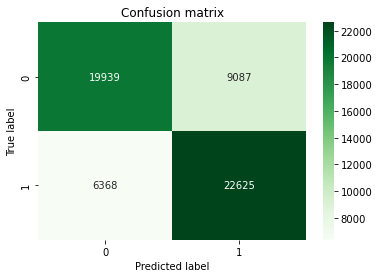

In [24]:
# Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
# Define labels for the confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Non-suicide', 'Suicide']

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=categories, yticklabels=categories, fmt='g')

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# save the model to a file create sep jupyter for evaluation 
# find the misclassified words
# find what emotion vulgaities are classified as 